<a href="https://colab.research.google.com/github/paulodowd/EMATM0054_53/blob/main/L3_Magnetometer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labsheet 3: Magnetometer, Detecting a magnet.

In this labsheet we will learn to operate the magnetometer. The magnetometer is a sensor that is intended to detect the magnetic field lines around the planet Earth.  A magnetometer is ordinarily used to provide a sense of direction relative to magnetic north.  It is fun to think that for every sensor (or piece of technology) we may be able to find novel and unexpected uses.

In this labsheet we will also learn:
- How to install a software library in the Arduino IDE to use on the 3Pi+ robot.
- How to operate a digital protocol ($I^2C$) to exchange data with a peripheral device.



<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/info.png" align="left"> **Information:** For this labsheet, it is recommended that you first of all work within a new Arduino sketch.  This is because using $I^2C$ (`Wire.h`) can have a few complications.  Therefore, you can ignore the code stub to begin with.  Once you have the sensor working, a later exercise will be to refactor and integrate your magnetometer code into the code stub `Magnetometer.h` file.

<hr><br><br><br><br>

## Theory: Background information.

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/theory.png" align="left">  The 3Pi+ has two chips set out in the schematic as the "Inertia Measurement Unit" (IMU).  This is a phrase often used informally to describe a set of sensors that in combination can inform about a robot pose:

<p align="center">
<img src="https://github.com/paulodowd/EMATM0054_53/blob/main/Images/3PI_IMU_schem.png?raw=true">
</p>

In the above, we can see the chips `LIS3MDL` and `LSM6DS33`.  A quick search on the internet reveals that the LIS3MDL is the magnetometer (<a href="https://www.st.com/resource/en/datasheet/lis3mdl.pdf">datasheet</a>) whilst the LSM6DS33 is an gyro and accelerometer integrated into a single package (<a href="https://cdn.ozdisan.com/ETicaret_Dosya/615475_5463640.pdf">datasheet</a>).  In this labsheet, we will only focus on the `LIS3MDL` and how to use it to detect a magnet.

When we look at the above schematic, these two chips will communicate with the Arduino (32u4) along the connections made to the labels `SCL` and `SDA`, which are labelled as terminating at labels `D3` and `D2`.  If you want to see where these connect to the 32u4, you can find the labels `D3` and `D2` elsewhere in the robot schematic.

`SCL` stands for `Serial Clock`, and it is used to make sure that the microcontroller and peripheral device (here, out sensors) will read and write bits transmitted at the same time.  `SDA` stands for `Serial Data`, and it is the connection that is used to indicate a `0` or `1` being transmitted between the devices.  

In the future, if you see the labels `SCL` and `SDA`, there is a good chance you will be using the $I^2C$ protocol.  This protocol allows for many peripheral devices ("extra devices") to be attached to the microcontroller using the same `SCL` and `SDA` connections (wires, or traces on a circuit board).  This is highly convenient, because microcontrollers often have a relatively low number of pins to attach devices to.  The $I^C$ protocol can have up to 128 devices attached in it's typical configuration.

When many devices are connected together in this way, the connection is referred to as a `bus`.  Because there are many peripheral devices on a `bus`, the protocol requires that each device has a unique address - you can think of this like houses on a street which each have a unique post-box number.  

Therefore, in general the protocol requires the following steps:
1. Open a connection with a device using the address.
2. Request a specific transfer of information.
3. Either send or receive some information.
4. Close the connection with the device.

In this labsheet, we will use a software library written by a third-party (we can consider this to mean, "an unknown author" - and so we must be extra careful when thinking about deployment risks or potential bugs in our code). Using a software library means that someone else will have written some code to make using the `LIS3MDL` easier.   

We can locate the `LIS3MDL` on the control circuit board of the 3Pi+:

<p align="center">
<img src="https://github.com/paulodowd/EMATM0054_53/blob/main/Images/3PI_IMU_PCB.png?raw=true">
</p>

In the above, you can also see that Pololu have conveniently printed in white labels to indicate the orientation of the sensor devices.  We can see that the devices have their x axis orientated front-to-back, y axis left-to-right, and the z axis vertically through the robot.




<hr><br><br><br><br>


## Exercise 1: Installing an External Software Library

In this exercise, it is assumed that you are using the Arduino IDE version 1.8.19, which has been recommended to you.  This version is available for download at the <a href="https://www.arduino.cc/en/software">following webpage</a>: https://www.arduino.cc/en/software


<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/exercise.png" align="left">  Our first exercise is relatively simple - to follow some steps to install a software library. If you have any issues following these steps, it is recommended that you ask a member of the teaching staff for help.


1. Within the Arduino IDE, navigate to `Sketch -> Include Libary -> Manage Libraries...`.

<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/Arduino_ManageLibraries.jpg">
</p>

2. A `Library Manager` window will open.  This can be a little slow to update.  Within the search box, enter the text `LIS3MDL` and wait for the lower pane to update:

<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/Arduino_LibMan_LIS3MDL.jpg">
</p>

3. Click on the entry in the list that reads `LIS3MDL by Pololu` and click install (shown above as `INSTALLED`, after this step).

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/info.png" align="left"> **Information:** For the curious, you are encouraged to see what other libraries are available for the Arduino.  In the future, you might be able to use all sorts of sensors, motors and other extensions in your projects.  


<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/stop.png" align="left"> **Caution**: For both assessments EMATM0054/53, you are only permitted to use the libraries LIS3MDL by Pololu and LSM6 by Pololu.  **Using other libraries will be regarded as cheating, an academic offense.**  You can use standard C libraries or core Arduino libraries like `math.h`, etc.  As a general rule, if you need to install a library, don't use it - ask a member of teaching staff if you are unsure.

<hr><br><br><br><br>

## Exercise 2: Test that the LIS3MDL is Working.



<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/exercise.png" align="left">  Before we attempt to solve more difficult problems, it is important to check that our magnetometer device and software library are working properly in the simplest configuration.  In the future, you should adopt this practice to save yourself time in the long run.

1. Copy and paste the below code into a **new Arduino sketch**.  We use a new Arduino sketch because we want to avoid any existing code from causing potential issues. Therefore, we want the simplest test first of all:

```c
// Wire.h provides functions to use the I2C protocol.
#include <Wire.h>

// LISM3MDL provides functions to read the magnetometer
#include <LIS3MDL.h>


// LIS3MDL provides a class.  We create an instance of this
// class called "mag".  We will then use "mag" to access the
// the magnetomer device by method functions and variables
// inside the class.  You should be familiar with this mode
// or interaction with a class from Labsheet 1 and 2.
LIS3MDL mag;


void setup() {

  // Start the wire library for i2c.  Note: do not add this
  // command into a class constructor. It must occur (or be
  // called) from setup().  
  Wire.begin();

  // Serial for debug output
  Serial.begin(9600);
  Serial.println("***RESET***");
  delay(1000);


  // If you have a problem with your magnetometer, your code
  // will get stuck here and print the below message.
  if (!mag.init() ) {  // no..? :(

    // Since we failed to communicate with the
    // magnetometer, we put the robot into an infinite
    // while loop and report the error.
    while(1) {
      Serial.println("Failed to detect and initialize magnetometer!");
      delay(1000);
    }
  }

  // Initialisation was ok.  Set magnetometer to default settings.
  mag.enableDefault();

} // end of setup()


// Short loop to report magnetometer readings over Serial Print().
void loop() {

  // Calling this function from our instance of the LIS3MDL class
  // gets the latest readings from the magnetometer sensor.
  mag.read();

  // Print the readings over serial. m.x = x axis, etc.
  Serial.print(mag.m.x);
  Serial.print(",");
  Serial.print(mag.m.y);
  Serial.print(",");
  Serial.print(mag.m.z);

  // Remember to finish comma seperated values with a newline (\n)
  Serial.print("\n");

  // Short delay to keep things slow enough to observe on the
  // Serial Plotter.
  // There is a limit to how fast you
  // can make i2c readings.
  delay(100);

} // end of loop()
```

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/validate.png" align="left"> **Validate:** Use the **Serial Plotter** to check what values your magnetometer is reporting for the `x`, `y` and `z` axis.  How do these change as you move the robot around?  How does these values compare to your peer's 3Pi+ robot?  You should see some output like the example Serial Plotter screen shot below:

<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/Lab3_MagTest_Plotter.jpg">
</p>

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/observation.png" align="left"> **Observations:** Make some oberservations about how your magnetometer sensor responds to the environment.  It is recommended you try some of the following, and observe what happens:


- Try activating the motors on and off, and see how the sensor values respond.
- Try moving the robot (by hand) to different areas of the table you are working on.  Does the table have metal legs or supports?
- Try moving the magnet (provided for Assessment 1) near to the robot, around the robot.  When is it most obviously detected?  At what maximum range might it be detected?
- Try moving the robot over the magnet, whilst the placed is placed flat on the surface. Is the magnet detected at the rear of the robot? How localised (proximal, "close") is the detection?

<hr><br><br><br><br>

## Exercise 3: Implement a Calibration Routine

Before we progress to attempting to use the magnetometer to detect a magnet, it makes sense to try to mitigate some of the undesirable effects we observed in the last exercise.  In general, we want to provide our robot with as much information as possible - so we want to use all 3 axis of the magnetometer.  Therefore, it would be more convenient and consistent if all axis were reporting readings within the same range of values.



In your general task of "detecting the magnet", we can consider the magnet to be an **exceptional circumstance**.  Therefore, in all other circumstances, we would expect the magnetometer to exhibit a "normal" behaviour.  If we calibrate the magnetometer for a "normal" (or **ideal**) environment, we would expect all readings to fall within a particular range, representative of the Earth's magnetic field lines at our geographic location.  A magnet will provide a very localised and strong source of magnetic field lines, but the effect decays very rapidly with distance.  If this is true, we can then detect the magnet when the readings become **exceptional**, which will mean the robot is close to the magnet.  

We can achieve this effect by conducting an initial calibration routine, similar to the approach in Labsheet 2.  In the below plots, the 3Pi+ robot was programmed to collect readings whilst it was moved around in a 3D space, producing a range of small and large values for each axis (x,y,z).  

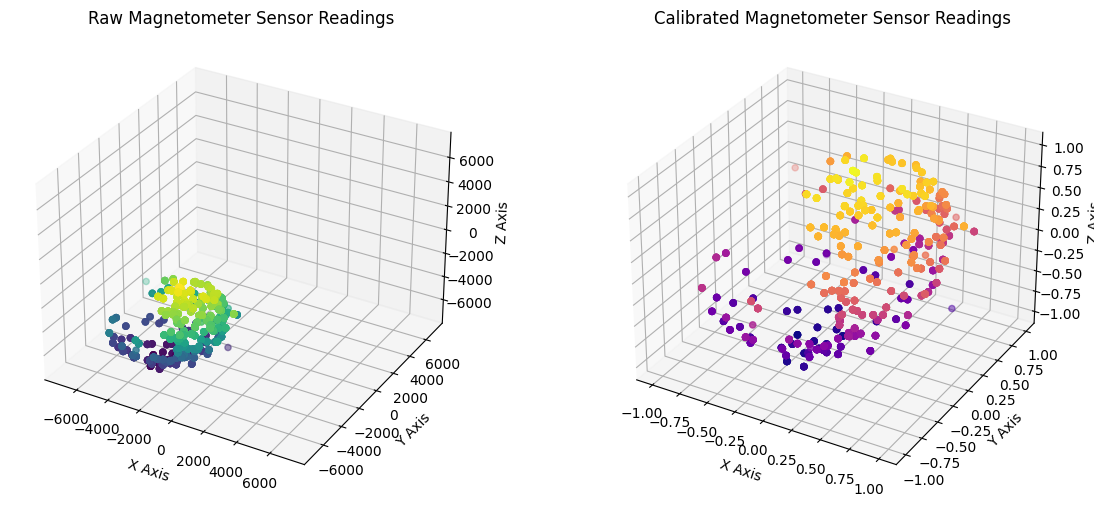

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import CSV stored on github.
# This could be your local computer directory
mag_raw = pd.read_csv('https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/ExampleData/magnetometer_raw.csv', sep=',')
mag_cal = pd.read_csv('https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/ExampleData/magnetometer_calibrated.csv', sep=',')

# Check format of data
#print(mag_raw)
#print(mag_cal)


# Create side by side subplots of readings
fig = plt.figure(figsize=(14, 6))

# Left plot (raw readings)
ax1 = fig.add_subplot(121, projection='3d')

# Plot the data as scatter plot
ax1.scatter(mag_raw['x'], mag_raw['y'], mag_raw['z'], c=mag_raw['z'], cmap='viridis')

# Ensure we have symetrical axis to help show the
# distortion in the measurments.  Our normalised
# readings will have symetrical axis values inherently.
largest_value = mag_raw[ ['x','y','z'] ].abs().max().max()
ax1.set_xlim(-largest_value, largest_value )
ax1.set_ylim(-largest_value, largest_value )
ax1.set_zlim(-largest_value, largest_value )

# Labels and title
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')
ax1.set_title('Raw Magnetometer Sensor Readings')

# Second plot on right (calibrated)
ax2 = fig.add_subplot(122, projection='3d')

# Plot the data
ax2.scatter(mag_cal['x'], mag_cal['y'], mag_cal['z'], c=mag_cal['z'], cmap='plasma')

# Labels and title
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')
ax2.set_zlabel('Z Axis')
ax2.set_title('Calibrated Magnetometer Sensor Readings')

# Show the plot
plt.show()

The above two plots show the range of raw (unprocessed) magnetometer readings taken from a 3Pi+ robot (left), and then the same values once they have been calibrated and normalised (right).  On the left, we can see how the magnetometer readings are clustered at an arbitrary point and range on the 3 axis.  After calibration and normalisation, the readings are centered and standardised on all axis to a range [ -1.0 : +1.0 ] - this is much easier to work with!  If we don't perform this calibration and normalisation, then if we try to compare the "magnitude" (size) of the readings across the x,y,z axis they will be at very different scales.  You can click "show code" to see how to make 3D plot like this, as well as review the example data stored in the .csv file format.

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/exercise.png" align="left">  In Labsheet 2, you were encouraged to make a calibration routine where your robot rotated on the spot to measure `minimum`, `maximum` and `range` of the line sensors across the alternating black and white graphic.  In this exercise, your robot should rotate on the spot and collect magnetometer readings.  We expect these readings to be **both positive and negative**, so we will have to update the calibration process to normalise in the range [-1.0 : +1.0 ].  That means we need to know not only the range of the readings, but where the mid-point of the range is.



1. We will create the magnetometer calibration in the next exercise.  Let's take small steps.  First, integrate the magnetometer code from the previous exercsie with your calibration code for the line sensors.  This should mean your robot will rotate, collect line sensor readings, and also take magnetometer readings (`mag.read()`).  Check this works.


<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/info.png" align="left"> **Information:** It is recommended you create versions of your code.  The simplest way to do this is to save a current Arduino Sketch with a new suffix like `my_sketch_v2`, indicating it is the second version.  When chasing a horrible bug, you could completely ruin a good piece of code by mistake. Therefore, it is good to be able to go back to a previous version.



<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/stop.png" align="left"> **Caution:** If you are using Github (or other tools) to version your code, **your repository must be set to private**.  If other students access your repository and use your code - even without your knowing - the University will still consider your choice to make a public repository as sharing and therefore cheating - an academic offense.

 <img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/validate.png" align="left"> **Validate:** Check that your code for your line sensor calibration is still working as expected, even though this was a small addition.  

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/exercise.png" align="left">  Review the below pseudocode to capture the calibration values for your magnetometer.  Pay attention to the extra requirements for a sensor that is reporting both positive and negative values.

<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/pseudocode_calibrate_magnetometer.jpg">
</p>

1. Decide where you will write your calibration routine.  We want this to happen just once, when the robot turns on.  Therefore, somewhere in `setup()` makes sense.  You could encapsulate your calibration routine within a function that is called from `setup()`.

2. Create local variables to store the `minimum`, `maximum`, and `range` values for each axis.  We can use local variables as these can be temporary.   
- You can either use an array, like `float minimum[3];` or create individual variables like `float minimum_x, minimum_y, mimumum_z;`.

3. Create global variables for `offset` and `scaling` values.  These need to "be remembered" (persistent) through the operation of your robot.  Again, use either arrays or single variable instances.

4. Implement the two-step process indicated in the pseudocode above:
- First, capturing recent sensor readings whilst the robot rotates.
- Second, calculating the final calibration values to store.

 <img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/validate.png" align="left"> **Validate:** Use the Serial Monitor to check that your calibration routine is providing calibration values that are sensible.  For example, is the Offset value the mid-point of the mimimum and maximum values?  

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/exercise.png" align="left">  Once you have the calibration routine, now test that you can apply the calibration values to your sensor readings.  When you apply these calibration values, the results are your new sensor readings.  We expect these sensor readings to now sit in the range [ -1.0 : +1.0 ] under normal circumstances (without the magnet).  Review the below pseudocode:

<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/pseudocode_apply_calibration_magnetometer.jpg">
</p>

1. Write a new function that applies the calibration values as per the pseudocode above.  Give this function a useful name, such as `calcCalibratedMag()`.  
  - Remember that the `mag` instance of `LISM3MDL` is declared as a global variable, so you don't need to pass an argument to your function.  You can access `mag` anywhere in your top level code.
  - Instead of trying to return an array of your calibrated sensor readings from your function (for $Calibrated_{n}$, above), instead make a global variable(s).  In general, excessive use of global variables is bad practice.  However, we are also working with a small microcontroller system, and so we have a good overview of how our computer memory is being used.  It is recommended you get your solution working first, and then refactor the code to improve it later.  It helps to first come to understand the problem, and then work on making a more optimal or efficient solution afterwards.

 <img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/validate.png" align="left">  **Validate:** Use the Serial Monitor and Serial Plotter to check that your calibrated values are as expected, a value in the range of [-1.0 : +1.0 ].  You may notice that your values do sometimes exceed [ -1.0 : +1.0 ] - it is important to **analyse** and **evaluate** for yourself if the magnitude of this is significant - do you think it will effect the performance of your system?

<hr><br><br><br><br>

## Exercise 4: Detecting a Magnet

This section will guide you to find a solution to detect a magnet.  There are many possible ways to do this.  In the previous exercises we have validated that the magnetometer is working, and we have normalised the readings to be between [ -1.00 : +1.00 ].  The simplest way to detect the magnet is to look for when the magnitude of these readings exceeds our normalisation by a significant amount.  We can combine all three axis into a single measurement using the following equation:

<p align="center">
  $ m = \sqrt{ x_{c}^2 + y_{c}^2 + z_{c}^2 }$
</p>

where $m$ is the total magnitude measured, $x_{c}$ is our calibrated x axis reading, $y_{c}$ is our calibrated y axis reading and $z_{c}$ is our calibrated z axis reading.



<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/exercise.png" align="left">  **Exercise:** In this exercise we will experiment with the effect of the magnet on the reported value of $m$.  It is recommended that in this exercise you allow your robot to rotate to perform the initial calibration, and then test the magnetometer without the robot moving. You can either do this with `motors.setPWM(0,0);` (turning off the motors), or by lifting the robot off the surface slightly.  You can then slide the magnet provided to you across the surface towards the robot and observe the effect.

1. Implement the above equation into your current solution.  
2. Use Serial Print to report only the value of $m$ to the Serial Monitor or Serial Plotter.  
3. Decide what value of $m$ should be used to identify the presence of the magnet.  You could call this `detect_threshold` or similar.
4. Write an `if()` statement that will activate the Buzzer when the magnet is detected, and deactivate the buzzer when it is not detected.  
5. Use the noise of the buzzer to allow you to adjust the value of your `detect_threshold`.  Investigate how close or how far a distance your robot can reliably detect the magnet.

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/observation.png" align="left"> **Observations:** Give special attention to where around the robot body the magnet is being detected.  Why is this?

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/hypothesis.png" align="left">**Hypothesise:** What effect, if any, might the motors have on the magnetometer readings?  What likely causes would this be?    What would you expect to observe in the magnetometer readings?  What effects would you predict to observe in the context of detecting a magnet?  Do you predict a difference between  the robot being off the surface with motors active, compared to the robot on the surface with the motors active?  How might you conduct a simple test to observe and measure these effects?  <br><br><br>

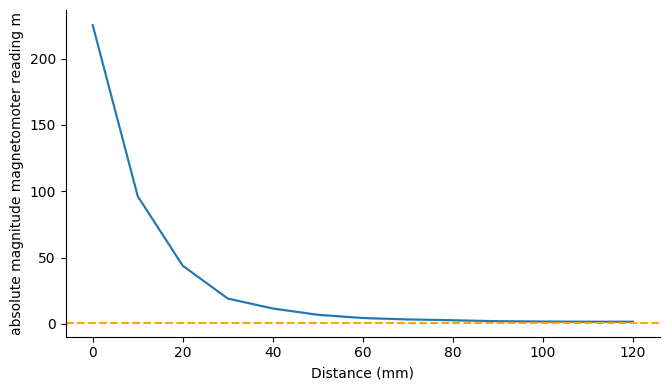

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import CSV stored on github.
# This could be your local computer directory
mag_dist = pd.read_csv('https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/ExampleData/magnetometer_distance.csv', sep=',')

rel_plot = sns.relplot( data=mag_dist, x="distance", y="m", kind="line", height=4, aspect=1.7)
# Add a dashed orange line at y=1.0
rel_plot.set_axis_labels("Distance (mm)", "absolute magnitude magnetomoter reading m")
plt.axhline(y=1.0, color='orange', linestyle='--')
plt.show()

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/hypothesis.png" align="left">**Hypothesise:** After calibration we expect the nominal value of $m$ to be approximately in the range of [ 0.0 : 1.0 ].  The value 1.0 is shown as a dashed orange line on the above plot.  The above plot is produced from a 3Pi+, with the measurements taken with the magnet at the distance intervals marked on the x-axis.  We can see that left of 80mm, the value of $m$ begins to be greater than 1.0, which we take to mean the presence of a magnet.  What does the gradient of the plot relate to, in terms of the accuracy and precision of detecting a magnet?  What would we predict to observe in robot behaviour, if we set a detection threshold at various values relative to the above plot?  For example, what would be the observable impacts (i.e. what would we see if we were watching the robot?) of a threshold value of 2.0, compared to a threshold value of 15.0?

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/info.png" align="left"> **Information:** The above plot has been produced with just one 3Pi+ robot.  It should not be regarded as the "absolute truth" - rather, it is anecdotal.  Therefore, it is not a proven fact that all magnetometers will produce the plot above.  You should conduct your own investigations with your 3Pi+ robot.

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/exercise.png" align="left">  **Exercise:** Update your code to now allow your robot to move after calibration.  Program your robot to stop (`motors.setPWM(0,0);`) when it has detected the magnet.  You will also find it extremely useful if your robot makes a short beep sound when the threshold value is crossed - this way you will hear when the magnet has been detected, even if your robot movement is not what you expect.


1. Start with programming your robot to simply move forwards and then stop when $m$ grows larger than your threshold value (magnet detected).  
2. Once you are satisfied with (1), update your code to allow your robot to explore the environment from different starting positions, and again stop when it detects the magnet.

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/observation.png" align="left"> **Observations:** Take the time to observe the stopping position of your robot relative to the magnet.  On which side of the robot is the magnet?  How close is the magnet?  Does the magnet go under the robot?  How much can you move the magnet to cause your robot to move again?

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/validate.png" align="left"> **Validate:** In this exercise, we are using a fixed threshold value to determine whether there is a magnet present or not.  Conduct some tests to validate how reliable and robust your detection mechanism is.  You may also want to explore the effect of the speed of movement of your robot.

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/hypothesis.png" align="left">**Hypothesise:** For the last component of Assessment 1, your 3Pi+ robot should return to the position of the magnet.  Therefore, when your robot stops and detects the magnet, it will need to record the magnet position.  The only reference for this will be the robot's estimate of it's own position.  Therefore, theorise on the effect of the detection distance on the ability of your robot to return to the position of the magnet (i.e. not the position of the robot at the time of detection).  What would be a potential problem with a very small detection range?

<hr><br><br><br><br>

#Advanced Exercises

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/tick.png" align="left">  This is a good place to progress into the next Labsheet.  The following exercises are the most advanced in these labsheets, and they should only be attempted when you have solved Assessment 1 to a high level of success.  If you have not done this yet, the next labsheet will help you to integrate a solution to complete Assessment 1.  It is recommended you work in small steps, and so produce a **minimal solution** first.  You can come back to complete the advanced exercises later to improve your Assessment 1 solution further.

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/info.png" align="left"> **Information:** Now that you have the magnetometer working and you understand the related problems, it would be a good time to consider refactoring your code.  The code stub provided for you (<a href="https://github.com/paulodowd/EMATM0054_53/tree/main/3Pi_CodeStub">here</a>) has a class definition, `Magnetometer_c` inside `Magnetometer.h`.   If you refacto your code it will be more readable and more portable (transferable to other projects).  For example, you will be able to copy and paste your `Magnetometer.h` file into your project for Assessment 2, if you elect to do a project with the magnetometer.   To use the `Magnetometer_c` class, you will need to:
  - uncomment the line `#include "Magnetometer.h"` at the top level of your program.
  - create a new global variable for an instance of the class, like `Magnetometer_c my_mag;`
  - remove any existing instance of `LIS3MDL` class from the top level of your program.
  - remove existing calls in your program to `Wire.begin()` and `mag.init()`, because these are placed for you within the `Magnetometer_c` class definition.
    


<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/info.png" align="left"> **Information:** In the below exercises, we attempt to make further improvements the estimation of the magnet position within the global frame of reference.  It is worth noting that whether or not we can estimate the position will still be significantly impacted by whether your robot is able to travel reliably between cartesian coordinates.  Therefore, you may want to troubleshoot and investigate your kinematics and higher level movement behaviours (Labsheet 4) before working on these exercises.

<hr><br><br><br><br>

## Exercise 5: Estimating Angular Location of the Magnet

Previously we have simply used the absolute magnitude of combined signals from the x, y and z axis of the magnetometer (Exercise 4).  This has allowed us to decide if a magnet is present or not.

In this exercise, we will investigate using the individual readings from the `x` and `y` axis of the sensor to estimate a more precise angular position of the magnet with respect to the sensor.

To achieve this is relatively simple: we regard the calibrated x measurement as a vector aligned to the x-axis, and the calibrated y measurement as a vector aligned to the y-axis.  Importantly, the magnet is causing exceptional values (outside of our normalised range [-1.0 : +1.0], so we cannot regard the x and readings simply as respective coordinates.  However, the readings are in proportion to each other because we have completed a calibration.

We then use the function `atan2()` (<a href="https://en.wikipedia.org/wiki/Atan2">more information here</a>) to resolve these relative and proportional components into an angle in radians.  

<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/Processing_MagPlotting.png">
</p>

The above image is a screen capture from a visualisation program provided to you to help debug and understand how your magnetometer is operating.  It is written in Processing, a free integrated development environment (IDE) that is very similar to the Arduino IDE.

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/info.png" align="left"> **Information:** This technique was **not** used to produce the example videos for Assessment 1. Therefore, it is not necessary to use this technique to achieve a high mark for Assessment 1. However, it is provided as a matter of interest.

1. For this exercise, you should program your robot to first perform the calibration for the magnetometer.
2. Once the magnetometer calibration is complete, ensure your robot remains in a fixed position (does not move).
3. Add the following line of code:
```c
float magnet_angle = atan2( calibrated_y, calibrated_x );
```
where `calibrated_y` and `calibrated_x` are the calibrated readings from your magnetometer.

4. Add lines of code that will report `<magnet_angle>,<m>,<calibrated_x>,<calibrated_y>\n` over Serial.  E.g., you should be able to view on the Serial Monitor something like `-2.11, 1.4, -0.8, 0.74` repeating (but changing if the magnet is introduced!).

5. Download Processing, available <a href="https://processing.org/download">here</a> (https://processing.org/download).

6. Download the example Processing program (sketch) from the same Github repository as these labsheets, available under `ProcessingExample/` (<a href="https://github.com/paulodowd/EMATM0054_53/tree/main/ProcessingExample/PlotMagnetometer">here</a>).
  - You will need to adjust the line `String portName = Serial.list()[1];` to select the correct port that your Pololu 3Pi+ is using, e.g. `Serial.list()[2];`.
  - You cannot use both the Serial Monitor/Plotter, and the Processing sketch at the same time.
  - The processing sketch is expecting to receive comma seperated floating point values as a string terminated in a newline.  If you deviate from this (for example, you have extra debugging comments through Serial.print()) you will get unexpected results.

7.  Explore different positions of the magnet, and how this is reflected in the visualisation created by the Processing program.
  - In processing, the coordinate system is configured such that `x=0` and `y=0` is the top left corner of the window.  The program is written to shift this down to the middle of the application window.

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/observation.png" align="left"> **Observations:** Manipulate the magnet position relative to the sensor and make observations.  Does the magnitude of the x measurement and the y measurement from the magnetometer sensor make sense to you?  Does either of these need to be inverted?  Is the `magnet_angle` as you expect?  Does it need to be shifted or inverted?

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/observation.png" align="left"> **Observations:** Are your readings noisy or unstable?  If so, you could experiment with applying low-pass filters, which were discussed in Labsheet 1 under Advanced Exercises.

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/observation.png" align="left"> **Observations:** If you are transmitting four comma seperated values as recommended, the Processing program is drawing a vector with a magnitude determined by the value of $m$ received.  We can observe that magnitude (length) of the vector does appear to change in a sensible way, however it is out of proportion (not realistic).  We will investigate this in the next exercise.

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/info.png" align="left"> **Information:** The Processing program example is receiving comma seperated values, and then splitting them into variables.  This example program may be useful to you in Assessment 2, where you could adapt it to receive results from your robot and write them to a file on  your computer.

<hr><br><br><br><br>

## Exercise 6: Estimating X and Y location of the Magnet

In the previous exercise, we took the relative and proportional readings from the x and y axis of the magnetometer and used these to estimate the angular location of the magnet with respect to the sensor.  As a part of that exercise, you will have validated the operation, and corrected for any inconsistencies (such as the alignment of the angle with the forward direction of the robot itself).  Therefore, we have an estimated angle of direction towards the magnet, and now require a magnitude (an estimate of distance).  If we can estimate the distance, we will have the location of the magnet in a polar coordinate form (magnitude and angle).  We can then translate the polar form into an x and y location to simply add to the current x and y location of the robot.



Equation of the polynomial trend line: y = 0.19x² + -12.77x + 218.69


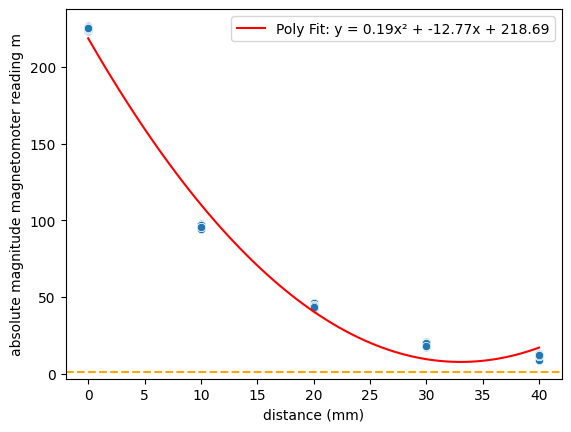

In [ ]:
# @title
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Import CSV stored on github.
# This could be your local computer directory
mag_dist = pd.read_csv('https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/ExampleData/magnetometer_distance.csv', sep=',')

# Let's only get a trendline for when the magnet is
# more reliably detected (closer distance)
mag_dist = mag_dist[ ( (mag_dist['distance'] < 50 ) ) ]

# Create a scatter plot
sns.scatterplot(x="distance", y="m", data=mag_dist)

# Fit a second-order polynomial to the data
coefficients = np.polyfit(mag_dist['distance'], mag_dist['m'], 2)

# Generate x values for plotting the polynomial line
x_vals = np.linspace(mag_dist['distance'].min(), mag_dist['distance'].max(), 100)

# Compute the y values based on the polynomial coefficients
poly_y_vals = np.polyval(coefficients, x_vals)

# Plot the second-order polynomial fit line
plt.plot(x_vals, poly_y_vals, color='red', label=f'Poly Fit: y = {coefficients[0]:.2f}x² + {coefficients[1]:.2f}x + {coefficients[2]:.2f}')

# Add a dashed orange line at y=1.0
plt.axhline(y=1.0, color='orange', linestyle='--')

# Set axis labels
plt.xlabel("distance (mm)")
plt.ylabel("absolute magnitude magnetomoter reading m")

# Print the equation of the polynomial fit
print(f"Equation of the polynomial trend line: y = {coefficients[0]:.2f}x² + {coefficients[1]:.2f}x + {coefficients[2]:.2f}")

# Show the plot
plt.legend()
plt.show()

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/exercise.png" align="left">  **Exercise:** The above plot has is a further processing of the plot of $m$ presented in Exercise 4.  The data has been truncated to distances below 40mm.  A polynomial fit of order 2 has been applied, with the equation presented.  We can therefore now read this graph in the opposite manner to normal: taking a position on the y-axis (the value of $m$), we can find the correlated distance on the x-axis in _mm_).

1. Click "Show Code" above the plot.  Explore the python code used to produce this plot.  
  - Try expanding the data selection to include distances above 40mm.  What do you notice about the polyfit line?
  - Try increasing the order of the polyfit (currently set to 2). What do you notice about the polyfit line?

2. We want our 3Pi+ robot to be able to take the value of $m$, and then use the equation of the polyfit to transform $m$ into _mm_.  Therefore, re-arrange the polyfit equation to make `x` the subject.
  - This is more difficult for higher order polynomials.
  - You can try other regressions, such as linear and logarithmic. You can also try different ranges of data.

3. Implement the re-arranged equation onto your 3Pi+ robot.  Test the transformation of $m$ into _mm_.
  - If you have the time, make a structured evaluation.  Collect a large number of samples with the magnet moved to exact position intervals from the sensor.  

4. Combine both your value of $m$ in _mm_ ($m_{mm}$) with your previous `magnet_angle` ($\theta_{m}$) using a polar to cartesian transform:
<p align="center">
$x_{m} = m_{mm} * cos( \theta_{m} )$
</p>
<p align="center">
$y_{m} = m_{mm} * sin( \theta_{m} )$
</p>

5.  Without your robot moving, try setting the initial pose of your robot x and y to be non-zero.  Therefore, we "simulate" that the robot has travelled. Then, print the resultant position of the magnet in the global frame, taking into account the robot pose.

6. To attempt to gain the best estimate of the magnet position, you will also need to take into account the displacement (distance and angle) of the magnetometer sensor chip from the robot centre.



<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/hypothesis.png" align="left">**Hypothesise:** In this exercise, the example plot has truncated data (a smaller set of data than the total available), where distance is less than 40mm.  Theorise on why this decision was made.  Whether or not this is the best choice has not been discussed or evidenced.

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/info.png" align="left"> **Information:** The above plot has been produced with just one 3Pi+ robot.  It should not be regarded as the "absolute truth" - rather, it is anecdotal.  Therefore, it is not a proven fact that all magnetometers will produce the plot above.  You should conduct your own investigations with your 3Pi+ robot.

<img src="https://raw.githubusercontent.com/paulodowd/EMATM0054_53/main/Images/observation.png" align="left"> **Observations:** When we consider the ability to reliably detect the presence of the magnet, and the attempt to translate our meaurements into an x and y position, it is important to recognise that the "useful range" of the magnetometer only extends in a small quadrant around the robot.  See if you can discover the limits of this "useful range".